# Лаба 1

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [262]:
f = lambda x1, x2 : np.array([1, x1, x1**2, x2**2, x2]) 
Q = np.array([1, 1, 0.01, 10, 0.01])
# xi = [-1, 1], i = 1, 2

In [263]:
u = lambda x1, x2: x1 + 0.01 * x1**2 + 0.01 * x2 + 10*x2**2 + 1

Text(0.5, 0, 'U')

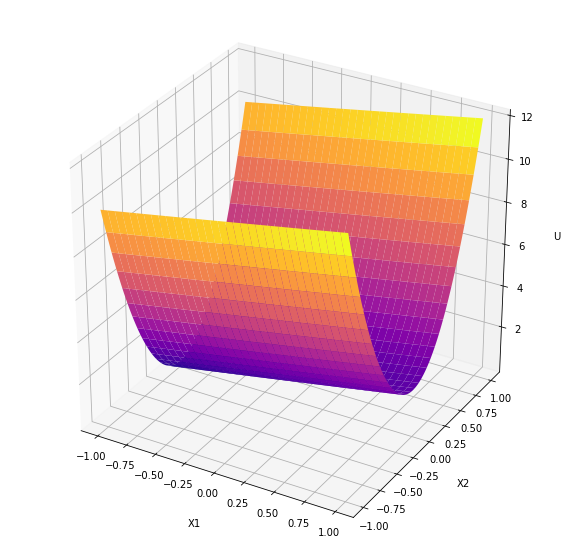

In [66]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
x1_val = np.linspace(-1, 1, 100)
x2_val = np.linspace(-1, 1, 100)
x1, x2 = np.meshgrid(x1_val, x2_val)
z = u(x1, x2)

surf = ax.plot_surface(x1, x2, z, rstride = 3, cstride = 3, cmap = cm.plasma)
ax.set_xlabel('X1', labelpad = 15)
ax.set_ylabel('X2', labelpad = 15)
ax.set_zlabel('U', labelpad = 15)

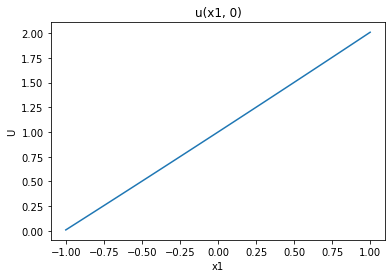

In [67]:
fig = plt.subplots()
x = np.linspace(-1, 1,100)
plt.plot(x, u(x, 0))
plt.title('u(x1, 0)')
plt.xlabel('x1')
plt.ylabel('U')
plt.show()

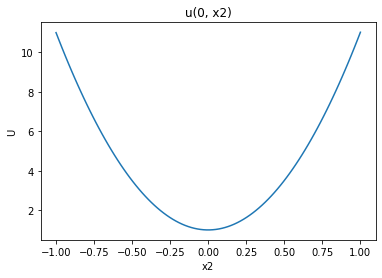

In [68]:
fig = plt.subplots()
x = np.linspace(-1, 1,100)
plt.plot(x, u(0, x))
plt.title('u(0, x2)')
plt.xlabel('x2')
plt.ylabel('U')
plt.show()

# Генерация данных

In [69]:
import random

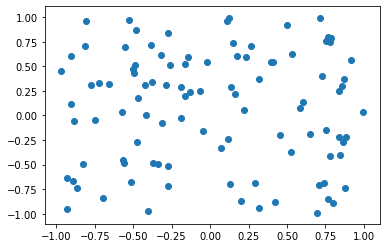

In [86]:
#генерим 100 точек
x = []
y = []
for i in range(100):
    x.append(random.uniform(-1,1))
    y.append(random.uniform(-1,1))

fig = plt.subplots()


plt.scatter(x, y)
plt.show()

In [215]:
import pandas as pd
df = pd.DataFrame(columns = ["i", "x1", "x2", "u", "y","y_o","u-y_o", "y-y_o"])
for i in range(len(x)):
    df.loc[i] = [i, x[i], y[i], u(x[i], y[i]),0,0,0,0]


In [216]:
vec_u = np.array(df.u)

In [217]:
df

,i,x1,x2,u,y,y_o,u-y_o,y-y_o
0,0.0,0.788203,0.790291,11.162465,0.0,0.0,0.0,0.0
1,1.0,0.315100,0.372358,3.292972,0.0,0.0,0.0,0.0
2,2.0,-0.273943,-0.719452,6.881166,0.0,0.0,0.0,0.0
3,3.0,0.648546,-0.191386,1.396511,0.0,0.0,0.0,0.0
4,4.0,0.711930,0.995261,15.175181,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
95,95.0,-0.481701,0.868814,5.985146,0.0,0.0,0.0,0.0
96,96.0,-0.866301,-0.741510,8.844008,0.0,0.0,0.0,0.0
97,97.0,-0.699489,-0.838180,10.253971,0.0,0.0,0.0,0.0
98,98.0,-0.259835,0.515763,2.736050,0.0,0.0,0.0,0.0


In [258]:
p = 0.1

In [261]:
mean = df.u.mean()
w2 = np.dot(df.u - mean, df.u - mean)/(len(df.u) - 1)
sigma = p*w2
sigma

1.2417324593071983

# Лаба 2

## Неизвестная случайная ошибка

In [122]:
import scipy
from scipy import optimize
import math

In [264]:
def l2(f, Q, u, p):
    for i in range(len(df.u)):
        df.u[i] = u(df.x1[i], df.x2[i])
    
    mean = df.u.mean()
    w2 = np.dot(df.u - mean, df.u - mean)/(len(df.u) - 1)
    sigma = p*w2
    
    e = np.random.normal(0, sigma**0.5, 100)
    for i in range(len(df['u'])):
        df['y'][i] = df["u"][i] + e[i]
        
    X = []
    for i in range(len(Q)):
        X.append([])
        for j in range(len(df['u'])):
            X[i].append(f(df['x1'][j],df['x2'][j])[i])
    X = np.matrix(X)
    
    QT = np.linalg.inv(X.dot(X.T))
    QT = QT.dot(X)
    QT = QT.dot(np.matrix(df.y).T)
    
    y_o = X.T.dot(QT)
    for i in range(len(df['u'])):
        df['y_o'][i] = y_o[i]
        df['y-y_o'][i] = df.y[i]-y_o[i]
        df['u-y_o'][i] = df.u[i]-df.y_o[i]
    e_o = df.y - df.y_o
    sigma2 = (e_o.T.dot(e_o)/(len(df["u"])-len(Q)))
    F = sigma2/sigma
    print(sigma)
    return QT, sigma2, F, X 

In [265]:
l2(f,Q,u,0.1)

0.9302920629153129


(matrix([[ 0.53665704],
         [ 1.09165376],
         [ 0.63244212],
         [10.14871161],
         [ 0.16811224]]),
 0.9414172564733786,
 1.011958818097622,
 matrix([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
           1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
           1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
           1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
           1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
           1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
           1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
           1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
           1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
           1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
           1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
           1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
           1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
           1.00000000e+00,  1.00000000e+00, 

In [257]:
df.to_excel("output.xlsx")

# Лаба 3

#### 1) Изменить модель регрессии, добавив в неё дополнительный регрессор, ранее не вошедший в состав модели, порождающей данные. Не генерируя новых данных, найти точечные оценки всех параметров расширенной модели. В дальнейшем при рассмотрении этой расширенной модели анализе должно быть показано, что параметр при дополнительном регрессоре незначим.

In [192]:
import numpy as np

In [266]:
f_old = lambda x1, x2 : np.array([1, x1, x1**2, x2**2, x2]) 
Q_old = np.array([1, 1, 0.01, 10, 0.01])
u_old = lambda x1, x2: x1 + 0.01 * x1**2 + 0.01 * x2 + 10*x2**2 + 1

# Добавим доп регрессор x1*x2
f = lambda x1, x2 : np.array([1, x1, x1**2, x2**2, x2, x1 * x2]) 
Q = np.array([1, 1, 0.01, 10, 0.01, 5])
u = lambda x1, x2: x1 + 0.01 * x1**2 + 0.01 * x2 + 10*x2**2 + 5*x1 * x2 + 1

In [267]:
#Оценки старой модели: 
QT_old, sigma2_old, F_old, X_old = l2(f_old,Q_old, u_old, 0.1)
print(QT_old, sigma2_old, F_old)

0.9302920629153129
[[ 0.99550863]
 [ 0.90959261]
 [-0.25964158]
 [10.49214603]
 [-0.11713406]] 1.040983641828225 1.118985836088971


In [268]:
#Оценки новой модели:
QT, sigma2, F, X = l2(f,Q,u,0.1)
print(QT, sigma2, F)
X.shape

1.2417324593071983
[[ 1.1351297 ]
 [ 1.06171035]
 [-0.26898166]
 [10.08584063]
 [ 0.12774644]
 [ 5.152072  ]] 1.2646159814943545 1.018428705809884


(6, 100)

#### 2) Построить доверительные интервалы для каждого параметра модели регрессии.

In [196]:
#n=100 m=6 квантиль распределение Стьюдента = 1.9850
t=1.950

In [197]:
djj=np.diagonal(np.linalg.inv((X.dot(X.T))))
sigma_Qj = np.diagonal(sigma2*np.linalg.inv((X.dot(X.T))))**0.5

Qmin = QT-t*np.matrix(sigma_Qj).T
Qmax = QT+t*np.matrix(sigma_Qj).T
print(Qmin)
print()
print(Q)
print(QT)
print()
print(Qmax)

[[ 0.92515579]
 [ 0.75621679]
 [-1.2325437 ]
 [ 9.09910373]
 [-0.59278387]
 [ 4.89721008]]

[ 1.    1.    0.01 10.    0.01  5.  ]
[[ 1.34909034]
 [ 1.12871413]
 [-0.46526057]
 [ 9.83786873]
 [-0.20581355]
 [ 5.53902085]]

[[ 1.7730249 ]
 [ 1.50121148]
 [ 0.30202255]
 [10.57663374]
 [ 0.18115678]
 [ 6.18083163]]


In [198]:
flag = 1
for i in range(len(Q)):
    if Q[i]<Qmax[i][0] and Q[i]>Qmin[i][0] and QT[i][0]<Qmax[i][0] and QT[i][0]>Qmin[i][0]:
        flag*=1
    else:
        flag=0
    print(flag)

1
1
1
1
1
1


In [199]:
Qmax.shape

(6, 1)

#### 3) Проверить гипотезу о незначимости каждого параметра модели.

In [200]:
#F(1,94) ~ 3.92 вроде бы

In [201]:
F=[]
for j in range(len(Q)):
    F.append(float(QT[j][0])**2/(sigma2*djj[j]))
    if F[j]<3.92:
        print('Принимается')
    else:
        print('Отвергается')
print(F)

Отвергается
Отвергается
Принимается
Отвергается
Принимается
Отвергается
[38.508238816493396, 34.913291033893024, 1.3981392541574167, 674.3085025516918, 1.0756272527303985, 283.2182396871203]


#### 4)  Проверить гипотезу о значимости самой регрессии.

In [202]:
RSS=(np.array(df.y)-X.T.dot(QT).T)
RSS=float(RSS.dot(RSS.T))
print(RSS)
RSSh=0
for i in range(len(df.y)):
    #RSSh+=(df.y[i]-df.u[i])**2
    RSSh+=(df.y[i]-np.mean(df.u))**2
print(RSSh)
m=6
n=100
q=m-1
F=((RSSh-RSS)/q)/(RSS/(n-m))
print(F)

117.81195686033985
1393.6067912169894
203.5866606845174


In [203]:
#F=278 > F(5,94) = 2.2899
#Гипотеза о незначимости регрессии отвергается

#### 5)  Рассчитать прогнозные значения для математического ожидания функции отклика для всего интервала действия одного из факторов, зафиксировав значения других факторов на границе или в центре области их определения.

In [204]:
sigma_nu = lambda x1, x2 : sigma2*float(f(x1,x2).dot(np.linalg.inv(X.dot(X.T)).dot(np.matrix(f(x1,x2)).T)))**0.5

In [205]:
def sigma_nu (x1, x2) : 
    return sigma2*np.array(f(x1,x2)*np.linalg.inv(X.dot(X.T))*np.matrix(f(x1,x2)).T)

In [206]:
nu = lambda x1, x2, Q : sum(np.array([1*Q[0], x1*Q[1], x1**2*Q[2], x2**2*Q[3], x2*Q[4], x1 * x2*Q[5]]))
nu_min = lambda x1, x2, Q : np.float64(nu(x1,x2,Q) - t*(sigma_nu(x1,x2)[0][0]))
nu_max = lambda x1, x2, Q : np.float64(nu(x1,x2,Q) + t*(sigma_nu(x1,x2)[0][0]))

In [207]:
#fig = plt.subplots()
#x = np.linspace(-1, 1,100)
#
#plt.plot(x, nu(x, 0,np.array(QT)))
#plt.plot(x, nu_min(x, 0,np.array(QT)))
#plt.plot(x, nu_max(x, 0,np.array(QT)))
#plt.title('u(x1, 0)')
#plt.show()

In [208]:
#fig = plt.subplots()
#x = np.linspace(-1, 1,100)
#
#plt.plot(x, nu(0, x,np.array(QT)))
#plt.plot(x, nu_min(0, x,np.array(QT)))
#plt.plot(x, nu_max(0, x,np.array(QT)))
#plt.title('u(0, x2)')
#plt.show()

#### 6) Построить график прогнозных значений и доверительной полосы для математического ожидания функции отклика и для самого отклика.

In [209]:
#fig = plt.subplots()
#x = np.linspace(-0.01, 0.01,100)
#
#plt.plot(x, nu(x, 0,np.array(QT)))
#plt.plot(x, nu_min(x, 0,np.array(QT)))
#plt.plot(x, nu_max(x, 0,np.array(QT)))
#plt.title('u(x1, 0)')
#plt.show()

In [210]:
#fig = plt.subplots()
#x = np.linspace(-0.0, 0.1,100)
#
#plt.plot(x, nu(0, x,np.array(QT)))
#plt.plot(x, nu_min(0, x,np.array(QT)))
#plt.plot(x, nu_max(0, x,np.array(QT)))
#plt.title('u(0, x2)')
#plt.show()

#### 7) Заново смоделировать исходные данные (см. лаб. работу № 1), увеличив мощность случайной помехи до 50…70 % от мощности полезного сигнала и провести оценку параметров. Повторить пункты 3, 4 с новыми данными.

In [211]:
#Мощность помехи — 50%

In [212]:
QT, sigma2, F, X = l2(f,Q,u,0.5)
print(QT, sigma2, F)
X.shape
#Модель неадекватная т.к. F > 1.23

6.208662296535991
[[ 0.33263837]
 [ 1.2520789 ]
 [ 1.7614618 ]
 [10.57516344]
 [ 0.01331277]
 [ 5.45423342]] 6.436198033880219 1.036648109766121


(6, 100)

In [213]:
#Проверка гипотезы о незначимости каждого параметра
F=[]
for j in range(len(Q)):
    F.append(float(QT[j][0])**2/(djj[j]))
    if F[j]<3.92:
        print('Принимается')
    else:
        print('Отвергается')
print(F)

Принимается
Отвергается
Отвергается
Отвергается
Принимается
Отвергается
[2.934119532100573, 53.84529647945343, 25.116892372859706, 976.5450462054232, 0.005640432181220409, 344.1788469170483]


In [214]:
#Проверка гипотезы о значимости самой регрессии
RSS=(np.array(df.y)-X.T.dot(QT).T)
RSS=float(RSS.dot(RSS.T))
RSSh=0
for i in range(len(df.y)):
    RSSh+=(df.y[i]-np.mean(df.u))**2
m=6
n=100
q=m-1
F=((RSSh-RSS)/q)/(RSS/(n-m))
print(F)

45.50271536645962


In [184]:
#F=1.34 < F(5,94) = 2.2899
# гипотеза о незначимости регрессии принимается